# Pose Detection with OpenPose

This notebook uses an open source project [CMU-Perceptual-Computing-Lab/openpose](https://github.com/CMU-Perceptual-Computing-Lab/openpose.git) to detect/track multi person poses on a given youtube video.

For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install OpenPose

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp '/content/drive/MyDrive/Project/Project_Gotcha/ipynb/OpenPose/backup/openpose.zip' './'
!cp '/content/drive/MyDrive/Project/Project_Gotcha/ipynb/OpenPose/backup/cmake-3.13.0-Linux-x86_64.tar.gz' './'
!unzip './openpose.zip'
!rm -r __MACOSX

In [5]:
import os
from os.path import exists, join, basename, splitext
from IPython.display import YouTubeVideo

# git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
# project_name = splitext(basename(git_repo_url))[0]
# if not exists(project_name):
    # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
    # install new CMake becaue of CUDA10
    # !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
!tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
    # clone openpose
    # !git clone -q --depth 1 $git_repo_url
    # !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
    # install system dependencies
!apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
# install python dependencies
!pip install -q youtube-dl
# build openpose
!cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`  

Selecting previously unselected package libgflags2.2.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../00-libgflags2.2_2.2.1-1_amd64.deb ...
Unpacking libgflags2.2 (2.2.1-1) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../01-libgflags-dev_2.2.1-1_amd64.deb ...
Unpacking libgflags-dev (2.2.1-1) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../02-libgoogle-glog0v5_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.3.5-1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to unpack .../03-libgoogle-glog-dev_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog-dev (0.3.5-1) ...
Selecting previously unselected package libhdf5-serial-dev.
Preparing to unpack .../04-libhdf5-serial-dev_1.10.0-patch1+docs-4_all.deb ...
Unpacking libhdf5-serial-dev (1.10.0-patch1+docs-4) ...
Selecting previously unselected package libleveldb1v5:amd64.
Preparing to unpack ...

## Detect poses on a test video

We are going to detect poses on the following youtube video:

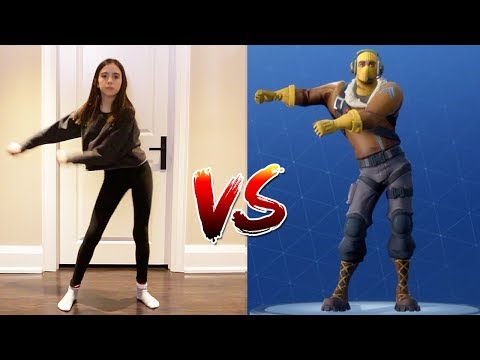

In [17]:
YOUTUBE_ID = 'RXABo9hm8B8'


YouTubeVideo(YOUTUBE_ID)

Download the above youtube video, cut the first 5 seconds and do the pose detection on that 5 seconds:

In [18]:
!rm -rf youtube.mp4
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the first 5 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -t 5 video.mp4
# detect poses on the these 5 seconds
!rm openpose.avi
!cd openpose && ./build/examples/openpose/openpose.bin --video ../video.mp4 --write_json ./output/ --display 0  --write_video ../openpose.avi --model_pose COCO
# convert the result into MP4
!ffmpeg -y -loglevel info -i openpose.avi output.mp4

[youtube] RXABo9hm8B8: Downloading webpage
[download] Destination: youtube.mp4
[download] 100% of 116.07MiB in 00:03
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis

Finally, visualize the result:

In [19]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4', width=960, height=720)

Output hidden; open in https://colab.research.google.com to view.

# Customize

In [ ]:
!./openpose/build/examples/openpose/openpose.bin --help

In [ ]:
# detect poses on the these 5 seconds
!rm openpose.avi
!cd openpose && ./build/examples/openpose/openpose.bin --video ../IMG_6709.mp4 --write_json ./output/ --display 0  --write_video ../openpose.avi --model_pose COCO
# convert the result into MP4
!ffmpeg -y -loglevel info -i openpose.avi output.mp4

In [ ]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4', width=960, height=720)

# Trim_Dataset_self 처리

In [ ]:
!rm openpose.avi
!cd openpose && ./build/examples/openpose/openpose.bin --video ../assault-kick_0.mp4 --write_json ./output/ --display 0  --write_video ../openpose.avi --model_pose COCO # assault 영상 처리
# convert the result into MP4
!ffmpeg -y -loglevel info -i openpose.avi output.mp4

In [ ]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4', width=960, height=720)

In [ ]:
# 개인 구글 드라이브 경로 연결
v = '../drive/MyDrive/Colab\ Notebooks/datasets/trim_dataset_self/assault-falldown_0.mp4'

# 경로 내 assault-falldown_0.mp4 잡는지 확인 (성공)
!cd openpose && ./build/examples/openpose/openpose.bin --video $v --write_json ../Outputs/ --display 0 --render_pose 0 --model_pose COCO

## Visualize 없이 json 파일을 추출하는 코드

In [ ]:
import glob

v_paths = glob.glob('/content/drive/My Drive/Colab Notebooks/datasets/trim_dataset_self/*.mp4')
print(v_paths)

v_paths = ['../drive/MyDrive/Colab\ Notebooks/' + v[40:] for v in v_paths]

# 경로 내 영상에서 프레임별로 skeleton json 정보만 빼온 후 Outputs 파일에 저장 
for v in v_paths:
  !cd openpose && ./build/examples/openpose/openpose.bin --video $v --write_json ../Outputs/ --display 0 --render_pose 0 --model_pose COCO


In [ ]:
!zip ./Outputs.zip ./Outputs/*

In [ ]:
!cp ./Outputs.zip ./drive/MyDrive/Colab\ Notebooks